In [27]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.python.client import device_lib
# GPU 사용
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# CPU 사용
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# # CPU, GPU 사용 가능 여부 print
# print(device_lib.list_local_devices())

### model load


In [28]:
model = tf.keras.models.load_model('/home/chichi/S12P21C201/src/AI/model_h5/model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

### 테스트 이미지 불러오기

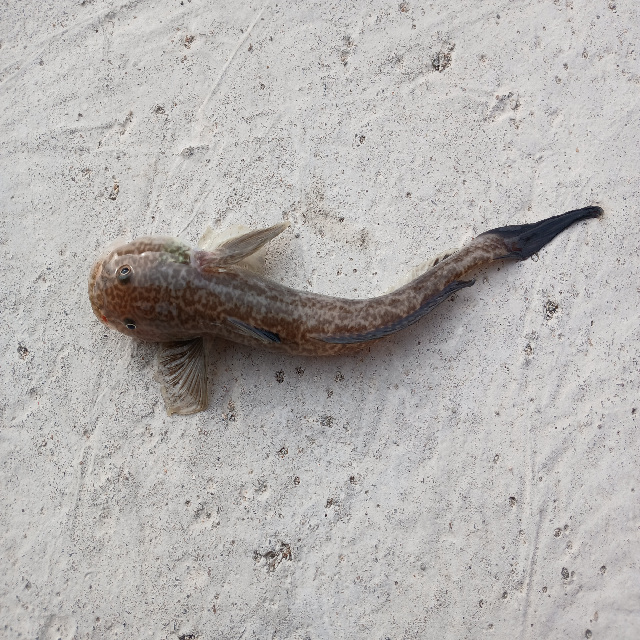

In [31]:
test1_img = tf.keras.preprocessing.image.load_img('/home/chichi/S12P21C201/src/AI/dataset/test_data/rn_image_picker_lib_temp_2ea0e1db-484b-4372-87cb-08bd7e31641b.jpg', 
                                            target_size=(640, 640))
img1_array = tf.keras.preprocessing.image.img_to_array(test1_img)
img1_array = np.array([img1_array])
test1_img

### 예측

In [32]:
class_names = ['감성돔', '벵에돔', '참돔', '복섬', '문어', '돌돔', '주꾸미', '성대', '문절망둑', '갑오징어', '노래미', '독가시치', '전갱이', '망상어', '고등어', '무늬오징어', '볼락', '광어', '우럭', '붕장어', '갈치', '양태', '숭어', '삼치', '학공치', '농어']

# generate predictions for samples
predictions = model.predict(img1_array)
print(predictions)

# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

# transform classes number into classes name|
print(class_names[class_id.item()])

1/1 [==============================] - 2s 2s/step
[[3.3012766e-04 1.9700954e-05 1.7174461e-04 9.3952376e-06 2.3976654e-06
  1.8259151e-06 2.3727834e-07 7.3542370e-04 9.7280234e-01 6.9175032e-05
  3.0463617e-04 7.4704185e-06 9.6364337e-04 6.7495729e-04 2.3395598e-05
  6.4254873e-06 3.1734867e-08 4.1650437e-05 8.8551766e-05 1.2472429e-03
  9.1963157e-05 2.0498862e-02 3.7582169e-04 2.4612460e-05 1.3192300e-03
  1.8906199e-04]]
[8]
문절망둑
